# Data Exploration
<p>
    This notebook should contain preliminary data exploration and graphing of the data set.
</p>
<p>
    Last modified 4/26/18 by Kate Baumli
</p>

In [23]:
import pandas as pd
import numpy as np
import re
import nltk
import math
import operator
import seaborn as sns
import matplotlib.pyplot as plt
import gender_guesser.detector as gender
from sklearn.cluster import KMeans
from collections import Counter
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.metrics import roc_auc_score
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold

from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
nltk.download('stopwords')
import os
import random

from sklearn.feature_extraction import text
from sklearn.model_selection import cross_val_score

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/katebaumli/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

First load up the data. Note this data was cleaned using clean.sh. We dropped NaNs, ran sentiment scores on polarity and subjectivity, removed nonwords, punctuation, and symbols from the transcripts and placed them in the column "clean_transcripts"

In [24]:
filepath = '../data/kaggle-data/'
filename = 'merged_data.csv'
data = pd.read_csv(filepath + filename)
# drop extra index columns
data.drop('Unnamed: 0', axis=1, inplace=True)
data.drop('Unnamed: 0.1', axis=1,inplace=True)
data.drop('Unnamed: 0.1.1', axis=1,inplace=True)

In [25]:
# Output suppressed
#data.describe()
#data.info()
data.head()

,transcript,url,clean_transcripts,comments,description,duration,event,film_date,languages,main_speaker,...,ratings,related_talks,speaker_occupation,tags,title,url.1,views,stripped_transcripts,polarity,subjectivity
0,Good morning. How are you?(Laughter)It's been ...,https://www.ted.com/talks/ken_robinson_says_sc...,good morninghow are you\nlaughter\nits been gr...,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,...,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,"['good', 'morninghow', 'are', 'you', 'laughter...",0.146452,0.462051
1,"Thank you so much, Chris. And it's truly a gre...",https://www.ted.com/talks/al_gore_on_averting_...,"thank you so much, chrisand its truly a great ...",265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,...,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,"['thank', 'you', 'so', 'much,', 'chrisand', 'i...",0.157775,0.424101
2,"(Music: ""The Sound of Silence,"" Simon & Garfun...",https://www.ted.com/talks/david_pogue_says_sim...,"music: the sound of silence, simon & garfunkel...",124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,...,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,"['music:', 'the', 'sound', 'of', 'silence,', '...",0.136579,0.475229
3,If you're here today and I'm very happy that ...,https://www.ted.com/talks/majora_carter_s_tale...,if youre here today and im very happy that yo...,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,...,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,"['if', 'youre', 'here', 'today', 'and', 'im', ...",0.082928,0.439165
4,"About 10 years ago, I took on the task to teac...",https://www.ted.com/talks/hans_rosling_shows_t...,"about 10 years ago, i took on the task to teac...",593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,...,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,"['about', '10', 'years', 'ago,', 'i', 'took', ...",0.096483,0.450631


In [26]:
# Output suppressed, this is to check data was cleaned properly
#print(data.clean_transcripts[0]) 

### Let's look at how our features are correlated:

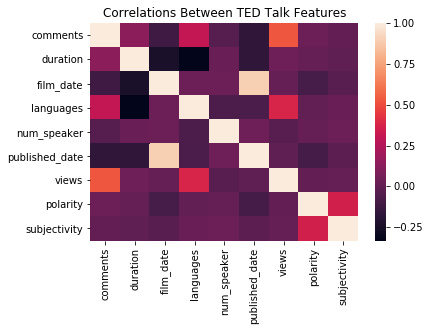

In [27]:
correlations = data.corr()
_ = sns.heatmap(correlations)
_ = plt.title('Correlations Between TED Talk Features')
plt.show()

Nothing too shocking here. We see that publish date and film date are correlated, as would be expected. We also see that views and comments are correlated, again, no shock there.

### Let's see what some of our features look like over time: 

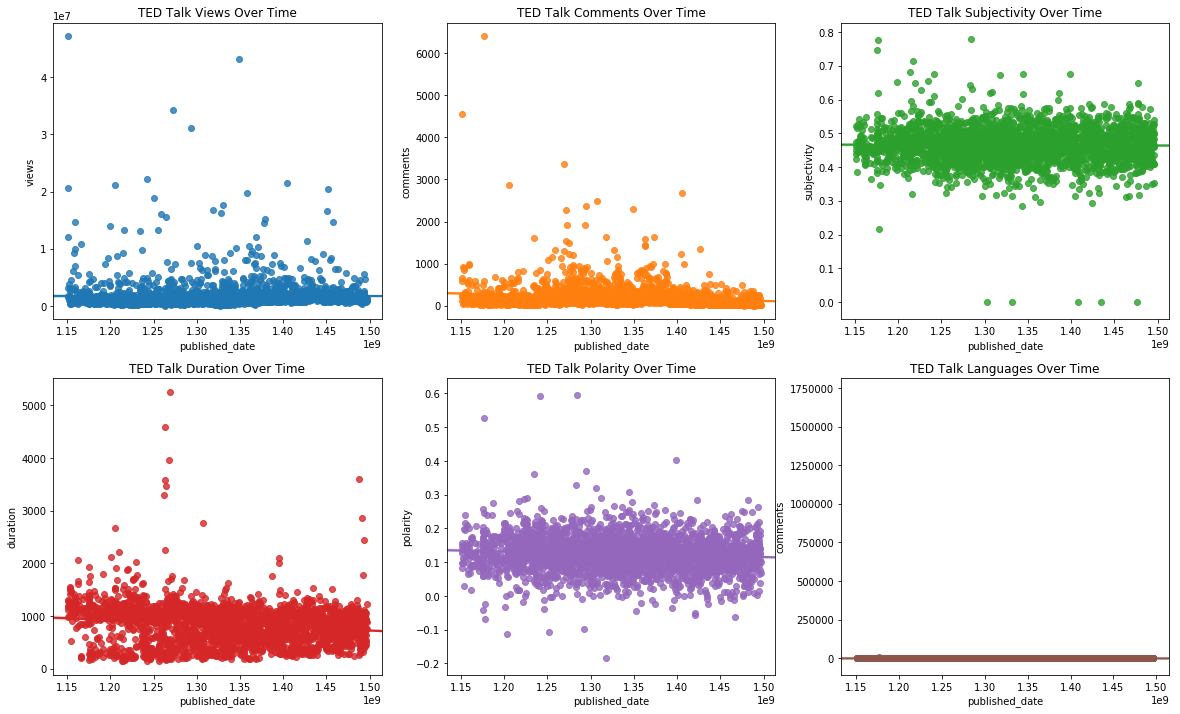

In [28]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))

# Views
_ = sns.regplot(x='published_date',y='views',data=data,ax=axes[0,0])
_ = axes[0,0].set_title('TED Talk Views Over Time')

# Comments
_ = sns.regplot(x='published_date',y='comments',data=data,ax=axes[0,1])
_ = axes[0,1].set_title('TED Talk Comments Over Time')

# Subjectivity
_ = sns.regplot(x='published_date',y='subjectivity',data=data,ax=axes[0,2])
_ = axes[0,2].set_title('TED Talk Subjectivity Over Time')

# Duration 
_ = sns.regplot(x='published_date',y='duration',data=data,ax=axes[1,0])
_ = axes[1,0].set_title('TED Talk Duration Over Time')

# Polarity
_ = sns.regplot(x='published_date',y='polarity',data=data,ax=axes[1,1])
_ = axes[1,1].set_title('TED Talk Polarity Over Time')

_ = sns.regplot(x='published_date',y='comments',data=data,ax=axes[1,2])
_ = axes[1,2].set_title('TED Talk Languages Over Time')

plt.show()

In [29]:
# Find transcript with the most words
maxLen = 0
for row in data.itertuples():
    if len(row.clean_transcripts.split()) >= maxLen:
        maxLen = len(row.clean_transcripts.split()) 
        longestTalk = row.name
print(maxLen)
print(longestTalk)

8760
Zeynep Tufekci: Machine intelligence makes human morals more important


In [30]:
def getWords(df,removeStopWords):
    words = []
    for row in df.itertuples():
        words.extend(row.clean_transcripts.split())
    
    # Removing Stopwords ('the', 'it', 'is', 'and', etc)
    if removeStopWords:
        stopWords = set(stopwords.words('english'))
        print("Removing the stop words... ")
        
        filteredWords =[]
        for word in words: 
            if word not in stopWords:
                filteredWords.append(word)
                
        return filteredWords
    
    return words

In [31]:
def mostFrequentWords(df, numWordsDesired, descriptor='', removeStopWords=True, normalize=False):
    # This loops over all rows in the clean transcripts column and 
    # puts every word in every transcript into a list called words
    words = getWords(df,removeStopWords)
    
    descriptor2=''
    if removeStopWords:
        descriptor2 = '(excluding stop words like \'the\')'
    
    # Get counts for each word
    wordCounts = Counter(words)
    print(descriptor,'Number of unique words:',descriptor2,len(wordCounts))

    # Grab the most common words
    mostCommon = dict()
    for word, wordCount in wordCounts.most_common(numWordsDesired):
        if normalize:
            # Divide by total # of words to get percentage of words said
            mostCommon[word] = wordCount/float(len(words)) 
        else:
            mostCommon[word] = wordCount
    # Plot a histogram
    _ = plt.figure(figsize=(20,10))
    _ = sns.barplot(list(mostCommon.keys()), list(mostCommon.values()))
    title = ('The '+str(numWordsDesired)+' Most Common Words ' + descriptor2 +
             ' In All ' + descriptor +' TED Talk Transcripts')
    _ = plt.title(title)
    _ = plt.xticks(rotation=300)
    plt.show()
    
    # Return list of most common words
    return mostCommon

Removing the stop words... 
 Number of unique words: (excluding stop words like 'the') 234988


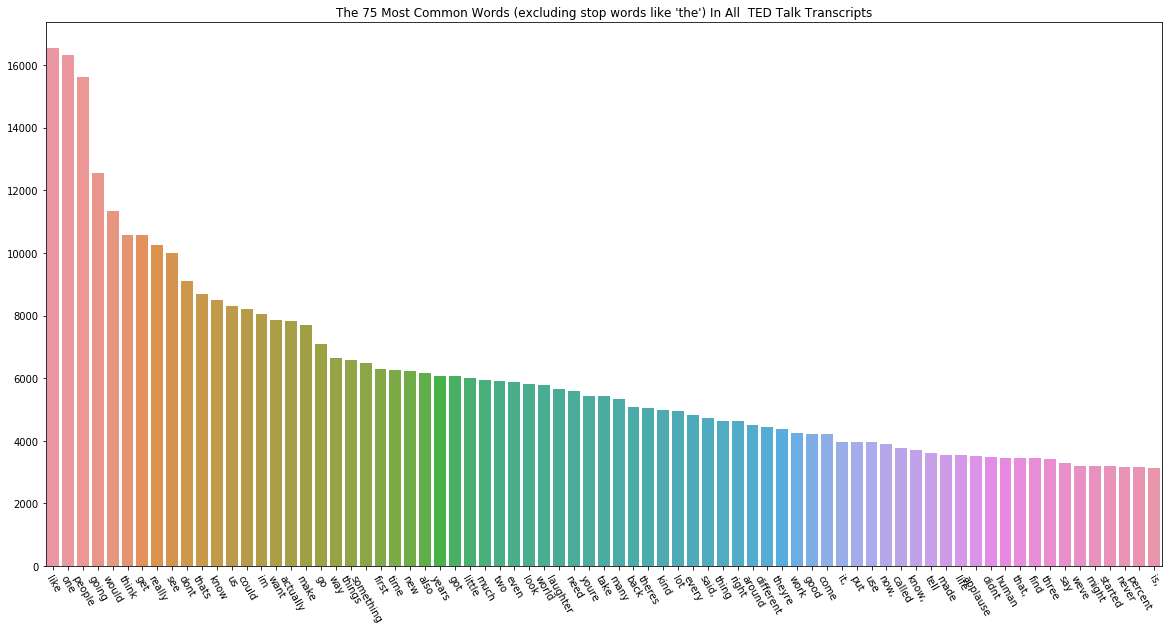

In [32]:
_ = mostFrequentWords(data,75)

### Let's break the data set into two segments based on (guessed) speaker gender.

In [33]:
genDetector = gender.Detector()
speakerNames = data.main_speaker.tolist()

speakerFirstNames = []
genders = []
for name in speakerNames:
    firstLastName = name.split(' ')
    firstName = firstLastName[0]
    speakerFirstNames.append(firstName)
    genders.append(genDetector.get_gender(firstName))
data['gender'] = genders

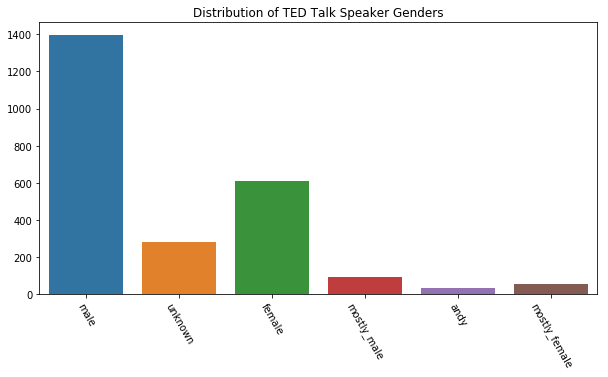

In [34]:
# Plot a histogram of genders
genderCounts = Counter(genders)
_ = plt.figure(figsize=(10,5))
_ = sns.barplot(list(genderCounts.keys()), list(genderCounts.values()))
title = 'Distribution of TED Talk Speaker Genders'
_ = plt.title(title)
_ = plt.xticks(rotation=300)
plt.show()

Let's go ahead and add the "mostly_female" names to female category and "mostly_male" names to male category.

In [35]:
for i,gender in enumerate(genders):
    if gender == 'mostly_male':
        genders[i] = 'male'
    if gender == 'mostly_female':
        genders[i] = 'female'
    if gender == 'andy':
        genders[i] = 'unknown' # No need to have 2 unknown categories if we're going to have to manually label anyways

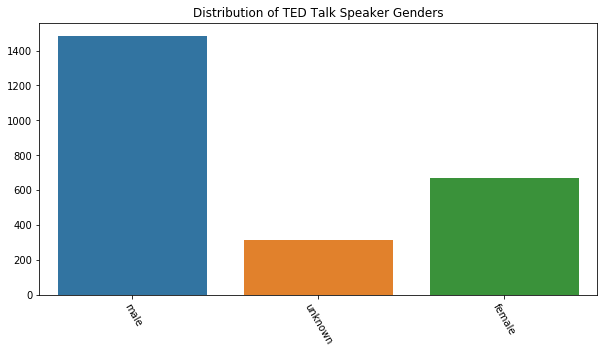

In [36]:
data['gender'] = genders
# Replot a histogram of genders
genderCounts = Counter(genders)
_ = plt.figure(figsize=(10,5))
_ = sns.barplot(list(genderCounts.keys()), list(genderCounts.values()))
title = 'Distribution of TED Talk Speaker Genders'
_ = plt.title(title)
_ = plt.xticks(rotation=300)
plt.show()

Aman went through and manualy labeled the 311 unknown gender speakers and came up with gender labels for each "unknown" labeled index:

In [37]:
maleIndexes = {21,32,35,48,58,64,78,92,102,124,130,134,135,144,154,171,175,194,222,233,249,261,270,289,317,320,324,360,371,393,415,419,449,480,482,484,485,487,512,523,553,556,570,577,583,587,591,593,594,597,599,608,624,627,632,723,732,747,761,780,781,790,797,810,837,879,880,896,897,900,905,919,957,959,962,966,979,1005,1010,1011,1018,1024,1038,1040,1081,1085,1090,1091,1100,1110,1113,1133,1137,1168,1180,1184,1198,1203,1225,1232,1235,1261,1270,1271,1272,1278,1363,1377,1383,1392,1395, 1397, 1398, 1407, 1423,1425, 1427,1437,1471,1474,1482,1505,1540,1548,1560,1583,1598,1605,1615,1640,1666,1684,1685,1706,1707,1746,1756,1766,1767,1772,1775,1782,1789,1791,1806,1814,1820,1825,1859,1872,1877,1887,1895,1927,1931,1944,1955,1972,2005,2012,2021,2042,2059,2081,2124,2159,2164,2176,2206,2223,2231,2238,2242,2247,2250,2288,2297,2300,2307,2309,2312,2338,2340,2394,2414,2418,2431,2437,2444,2450,2460}
femaleIndexes = {3,11,15,110,128,190,209,237,281,282,323,393,459,474,530,555,607,622,651,654,673,694,767,836,840,863,878,941,983,1000,1021,1027,1037,1089,1110,1149,1152,1177,1188,1189,1222,1248,1259,1275,1278,1305,1316,1332,1339,1412,1428,1451,1460,1505,1489,1495, 1512,1532,1539,1541,1562,1573,1587,1621,1626,1679,1703,1712,1721,1737,1748,1754,1761,1797,1819,1844,1856,1857,1883,1941,1945,1961,1975,1984,1992,2003,2010,2013,2049,2054,2067,2087,2088,2098,2099,2103,2112,2122,2128,2134,2157,2158,2168,2178,2193,2194,2222,2224,2257,2271,2294,2313,2325,2349,2361,2369,2375,2380,2382,2407,2419,2420,2429,2430,2455,2457}

In [38]:
for row in data.itertuples():
    # All this 'oldIndex' junk is to adjust for the 4 rows
    # we dropped after Aman labeled all of these indexes as male
    # or female. After we pass the index of each entry we dropped,
    # the index is actaully 1 less than the index aman wrote down,
    # so we add 1 to compensate.
    oldIndex = row[0]
    if row[0] > 152: 
        oldIndex += 1
    if row[0] > 574:
        oldIndex += 1
    if row[0] > 1373:
        oldIndex += 1
    if row[0] > 1922:
        oldIndex += 1
    if row.gender == 'unknown':
        if oldIndex in maleIndexes:
            data.loc[row[0],'gender'] = 'male'
        elif oldIndex in femaleIndexes:
            data.loc[row[0],'gender'] = 'female'
        else:
            print(row[0])

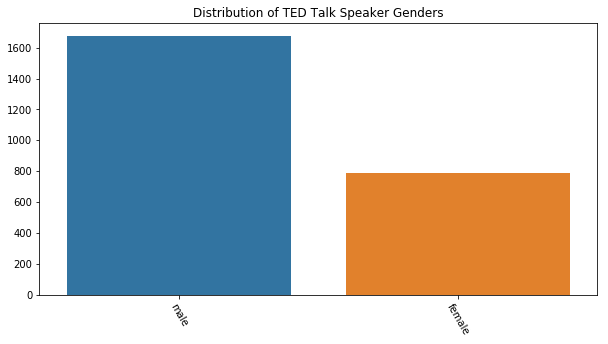

In [39]:
# Replot a histogram of genders
genderCounts = Counter(data['gender'])
_ = plt.figure(figsize=(10,5))
_ = sns.barplot(list(genderCounts.keys()), list(genderCounts.values()))
title = 'Distribution of TED Talk Speaker Genders'
_ = plt.title(title)
_ = plt.xticks(rotation=300)
plt.show()

Right off the bat we can see that about twice as many speakers are men than women(disregarding the unknown). Let's compare the average # of views of men vs women.<br>
Let's go ahead and assign numbers to these labels (0 to female 1 to male) to make predictions and analysis easier. 

In [60]:
genderBinary = label_binarize(data.gender.values,classes=['female','male'])
data['gender'] = genderBinary

### Let's build a simple gender classifier on the original data with no new features.

In [64]:
def getTFIDFvectors(dataframe):
    scripts = dataframe['transcript'].tolist()
    tfidfGenerator = text.TfidfVectorizer(input= scripts, stop_words= "english")
    matrix = tfidfGenerator.fit_transform(scripts)
    return matrix

In [119]:
def simpleGenderClf(dataframe,numFolds = 5):
    y = dataframe['gender'].values # What we're trying to predict
    X = dataframe.drop(labels=['gender'],axis=1).select_dtypes(include=[np.number]).values # Features we are using
        
    #Let's do k fold cross validation to see how well this baseline model performs
    skf = StratifiedKFold(n_splits=numFolds)
    _ = skf.get_n_splits(X, y)
    
    # These are the metrics we want to record
    AUCs = []
    FPRs = []
    TPRs = []
    accuracies = []

    for train_index, test_index in skf.split(X, y):
        rand = np.random.randint(1, 100) # Why here?
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf = LogisticRegression(penalty='l2', max_iter=1000, random_state=rand)
        _ = clf.fit(X_train, y_train)
        accuracies.append(clf.score(X_test, y_test))
        y_pred = clf.predict(X_test)
        y_pred_prob = clf.predict_proba(X_test)
        AUC = metrics.roc_auc_score(y_test,y_pred_prob[:,0])
        confusion = confusion_matrix(y_test,y_pred)
        _ = sns.heatmap(confusion)
        plt.show()
        AUCs.append(AUC)
        
    print('AUC:',np.mean(AUCs))

Original Data Scores:
|---------------------|
|true neg  | false pos|
|----------| ---------|
|false neg | true pos |
|---------------------|


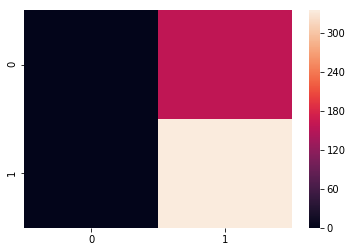

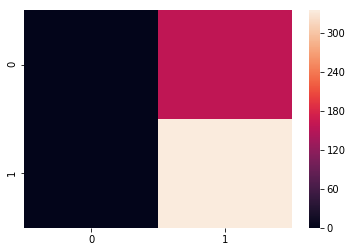

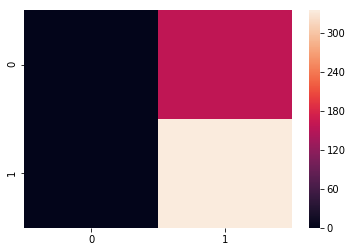

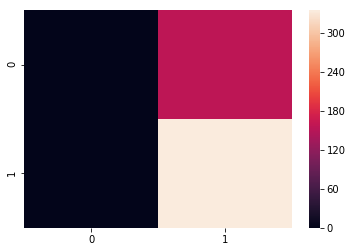

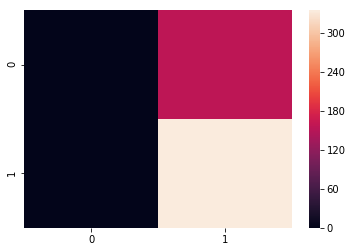

AUC: 0.574979837569


In [129]:
originalData = data.drop(labels=['polarity','subjectivity'], axis=1)
print('Original Data Scores:')
print('|---------------------|\n|true neg  | false pos|\n|----------| ---------|\n|false neg | true pos |\n|---------------------|')
simpleGenderClf(originalData)


As a baseline, our naive logistic regression predictor scores ~0.57 mean AUC across 5 validation folds.

In [89]:
print('Adding in polarity and subjectivity scores:')
simpleGenderClf(data)

Adding in polarity and subjectivity scores:
AUC: 0.574979837569


In [94]:
menTED = data[data['gender'] == 1]
womenTED = data[data['gender'] == 0]
#print('Description of male speaker TED data:')
#menTED.describe()
#print('Description of female speaker TED data:')
#womenTED.describe()

Let's compare the frequency of words:

Removing the stop words... 
Male Speaker Number of unique words: (excluding stop words like 'the') 183977


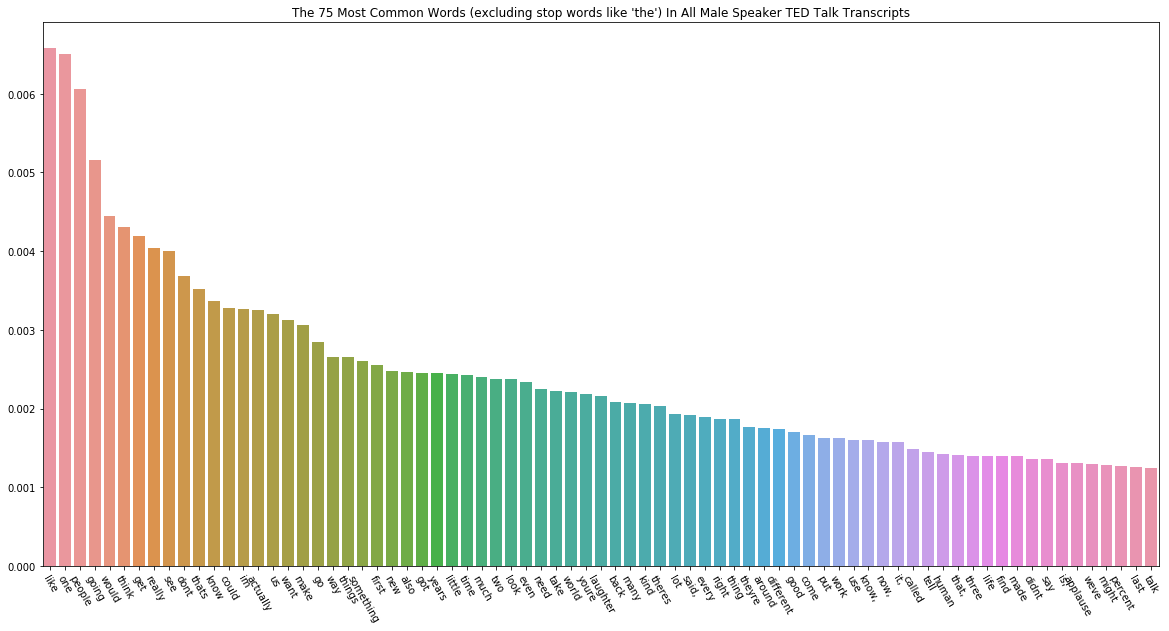

Removing the stop words... 
Female Speaker Number of unique words: (excluding stop words like 'the') 104353


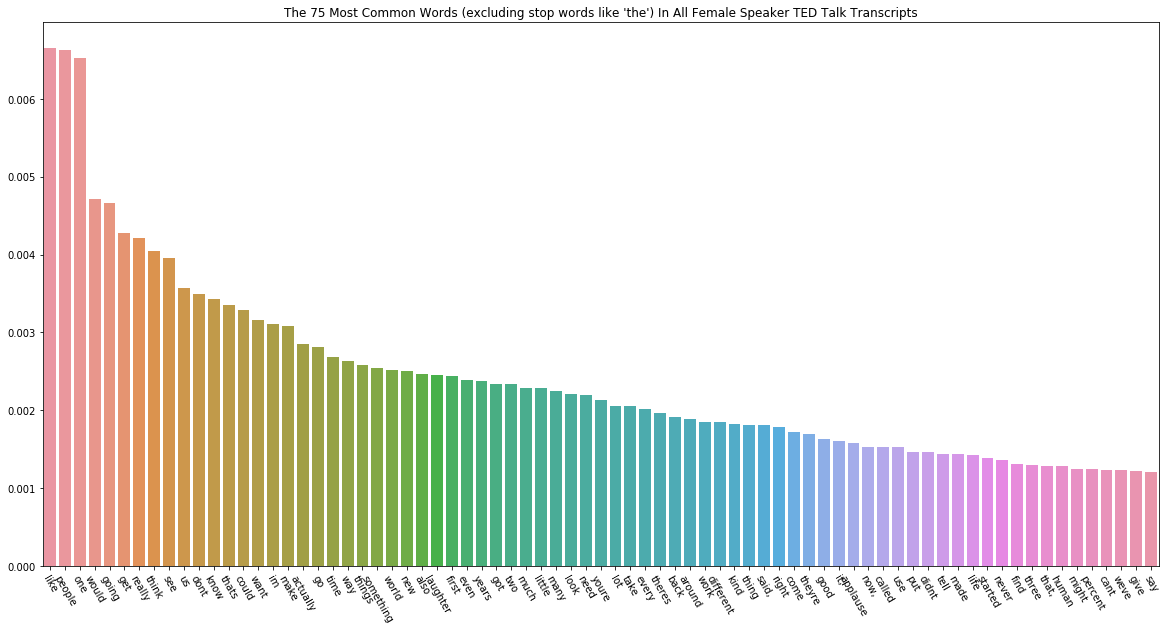

In [95]:
maleCommonWords = mostFrequentWords(menTED,75,'Male Speaker',normalize=True)
femaleCommonWords = mostFrequentWords(womenTED,75,'Female Speaker',normalize=True)

It's also interesting that men seem to pause more frequently than do women.

### Previous research on the differences of speech patterns between men and women, we have found that women are more likely to use speech qualifiers/intensifiers such as 'very','so','such','extremely','really','totally','absolutely', or 'too'. Let's look into that a little more here and compare our talks:

In [96]:
def getNormalizedGenderWordCounts():
    maleWords = getWords(menTED,removeStopWords=True)
    femaleWords = getWords(womenTED,removeStopWords=True)

    # Get counts for each word
    maleWordCounts = Counter(maleWords)
    femaleWordCounts = Counter(femaleWords)

    # Normalize counts by number of total words spoken by men 
    normalizedMaleWordCounts = {}
    for word,count in dict(maleWordCounts).items():
        normalizedMaleWordCounts[word] = count/float(len(maleWords))

    # Normalize counts by number of total words spoken by women 
    normalizedFemaleWordCounts = {}
    for word,count in dict(femaleWordCounts).items():
        normalizedFemaleWordCounts[word] = count/float(len(femaleWords))
        
    return normalizedMaleWordCounts, normalizedFemaleWordCounts

In [97]:
def menVsWomenWordCounts(wordsToCount):    
    normalizedMaleWordCounts, normalizedFemaleWordCounts = getNormalizedGenderWordCounts()
    maleCount = 0
    for word,count in normalizedMaleWordCounts.items():
        if word in wordsToCount:
            maleCount += count
        
    femaleCount = 0
    for word,count in normalizedFemaleWordCounts.items():
        if word in wordsToCount:
            femaleCount += count
            
    return maleCount, femaleCount

In [98]:
intensifiers = ['very','so','such','really','totally','too']
maleIntensifierCount, femaleIntensifierCount = menVsWomenWordCounts(intensifiers)

print('Percentage of intensifier words for men:  ',maleIntensifierCount)
print('Percentage of intensifier words for women:',femaleIntensifierCount)

Removing the stop words... 
Removing the stop words... 
Percentage of intensifier words for men:   0.0042368323967622665
Percentage of intensifier words for women: 0.004415542917221777


Some other studies https://www.washingtonpost.com/news/the-intersect/wp/2016/05/28/these-are-the-words-most-associated-with-men-and-women-according-to-facebook-status-updates/?noredirect=on&utm_term=.54981ab1318a have shown that women tend to use words that are more "warm and agreeable"

In [99]:
uncertainty = ['um','uh','-']
maleUncertaintyCount, femaleUncertaintyCount = menVsWomenWordCounts(uncertainty)
print('Percentage of uncertainty words for men:  ',maleUncertaintyCount)
print('Percentage of uncertainty words for women:',femaleUncertaintyCount)

Removing the stop words... 
Removing the stop words... 
Percentage of uncertainty words for men:   1.4456231734551204e-05
Percentage of uncertainty words for women: 7.730743362512595e-06


Flagging um and uh might prove useful in differentiating between genders

In [100]:
warmAndAgreeable = ['family','friends','wonderful','blessed','amazing','loving','husband','thankful']
maleWarmAgreeableCount, femaleWarmAgreeableCount = menVsWomenWordCounts(warmAndAgreeable)

print('Percentage of warm and agreeable words for men:  ',maleWarmAgreeableCount)
print('Percentage of warm and agreeable words for women:',femaleWarmAgreeableCount)

Removing the stop words... 
Removing the stop words... 
Percentage of warm and agreeable words for men:   0.0015046045989320891
Percentage of warm and agreeable words for women: 0.0018012632034654344


'Warm and agreeable' words could be useful to flag!

In [101]:
coldHearted = ['kill','kills','dead','killing','die','swear','dead','murder']
maleColdHeartedCount, femaleColdHeartedCount = menVsWomenWordCounts(coldHearted)

print('Percentage of cold hearted words for men:  ',maleColdHeartedCount)
print('Percentage of cold hearted words for women:',femaleColdHeartedCount)

Removing the stop words... 
Removing the stop words... 
Percentage of cold hearted words for men:   0.0005597452927618225
Percentage of cold hearted words for women: 0.0007009207315344753


'Cold hearted' words seem to be slightly more frequent for women than men. 

In [102]:
rational = ['opinion','opinions','logic','logical','based','political','fact','moral','beliefs']
maleRationalCount, femaleRationalCount = menVsWomenWordCounts(rational)
print('Percentage of rational words for men:  ',maleRationalCount)
print('Percentage of rational words for women:',femaleRationalCount)

Removing the stop words... 
Removing the stop words... 
Percentage of rational words for men:   0.0014618141529978176
Percentage of rational words for women: 0.0015190910707337246


Let's compare speed of speech of men and women. 

In [103]:
WPM = []
for row in data.itertuples():
    minutes = row.duration/float(60) # Duration is in seconds
    numWords = len(row.clean_transcripts.split(' '))
    WPM.append(numWords/float(minutes))
data['WPM'] = WPM

In [104]:
def compareGenders(feature):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
    # violin plots in seaborn require 2 catagorical variables ('x' and 'hue'). We use 'gender' for hue.
    placeholder = np.zeros(len(data[feature].values))
    _ = sns.violinplot(x=placeholder, y=data[feature], hue=data.gender,split=True,ax=axes[0], palette='bright')
    _ = axes[0].set_title('Comparing Distribution of '+feature+ ' by Gender')
    _ = sns.boxplot(x=placeholder,y=data[feature],hue=data.gender, ax = axes[1])
    _ = axes[1].set_title('Comparing Distribution of '+feature+ ' by Gender')
    plt.show()

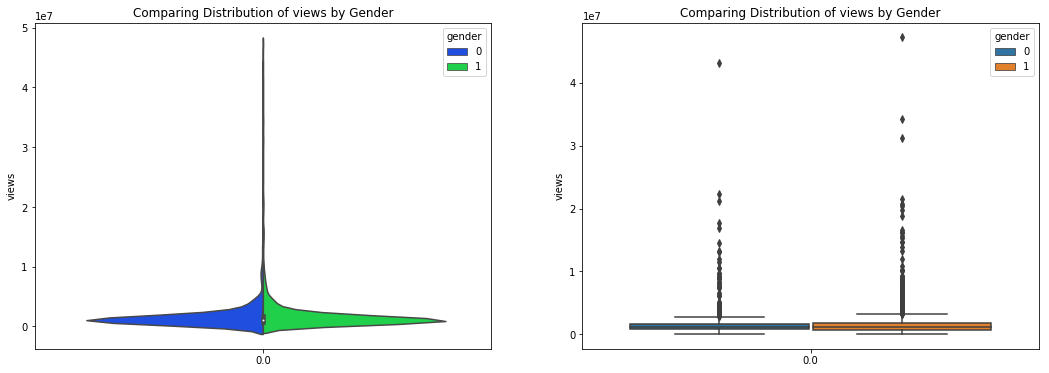

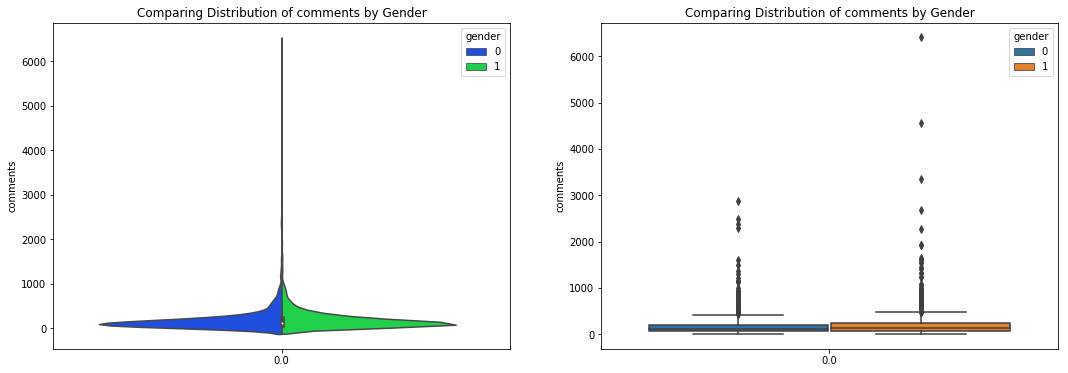

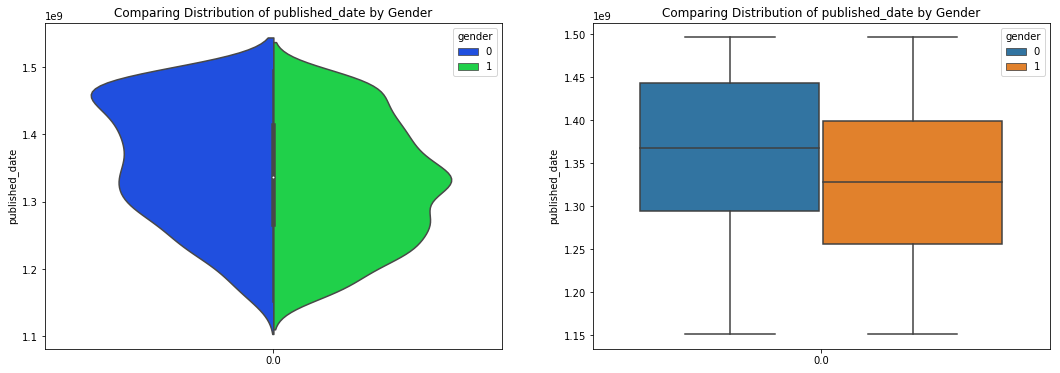

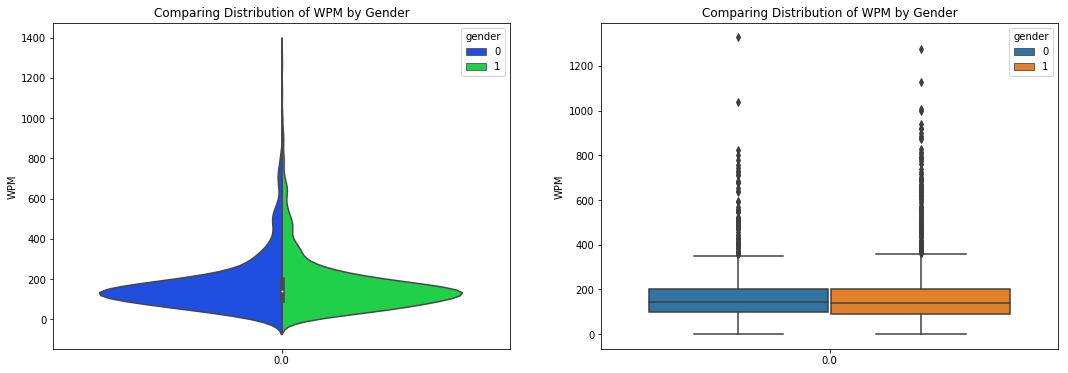

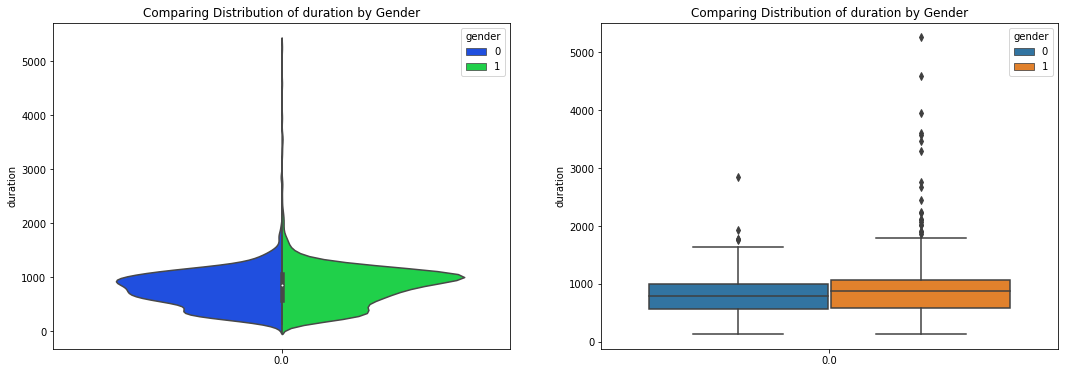

In [105]:
compareGenders('views')
compareGenders('comments')
compareGenders('published_date')
compareGenders('WPM')
compareGenders('duration')

Duration and published date seem to correlate with gender based on the plots above. These features could be useful to highlight when building a gender classifier. 

Now let's compare the amount of (laughter) and (applause) recieved by men and women normalized by the length of the talk.

In [106]:
laughter = []
applause = []
for row in data.itertuples():
    words = row.clean_transcripts.split() # Not the cleaned transcripts because those take out the () around laughter and applause
    laughCount = 0
    applauseCount = 0
    for word in words:
        if word == 'laughter':
            laughCount += 1
        if word == 'applause':
            applauseCount += 1
    laughter.append(laughCount/float(len(words))) # laugh to words ratio
    applause.append(applauseCount/float(len(words))) # applause to words ratio

data['laughter_ratio'] = laughter
data['applause_ratio'] = applause

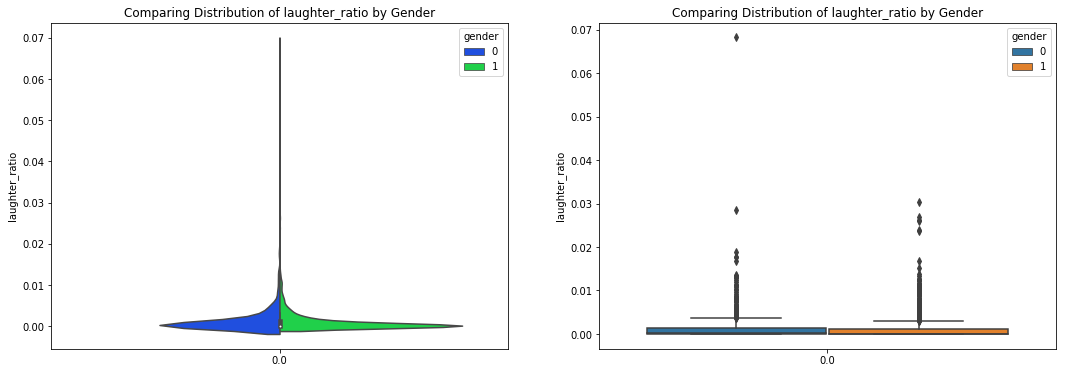

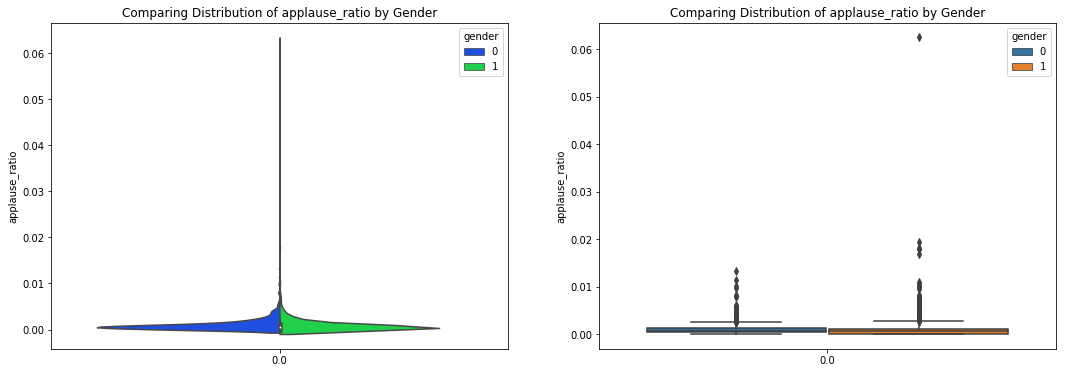

In [107]:
compareGenders('laughter_ratio')
compareGenders('applause_ratio')

In looking at this, we discovered some transcripts that did not have the words of the speeech besides (applause) and (laughter). We went back and removed these from the set so they are not shown here.  

Removing the stop words... 
Removing the stop words... 


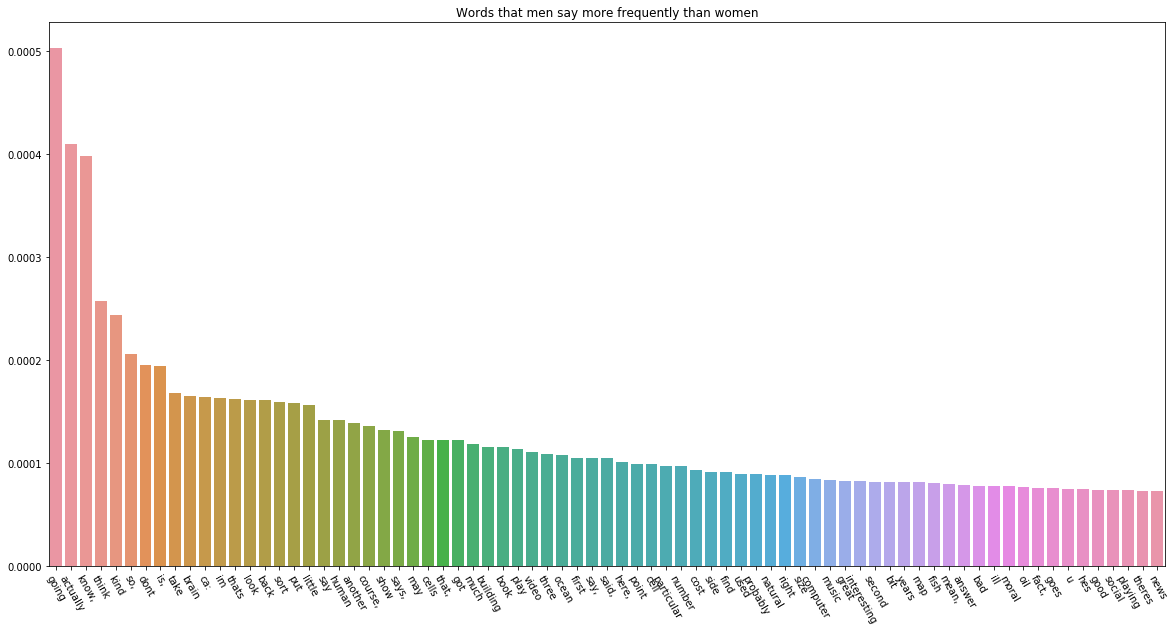

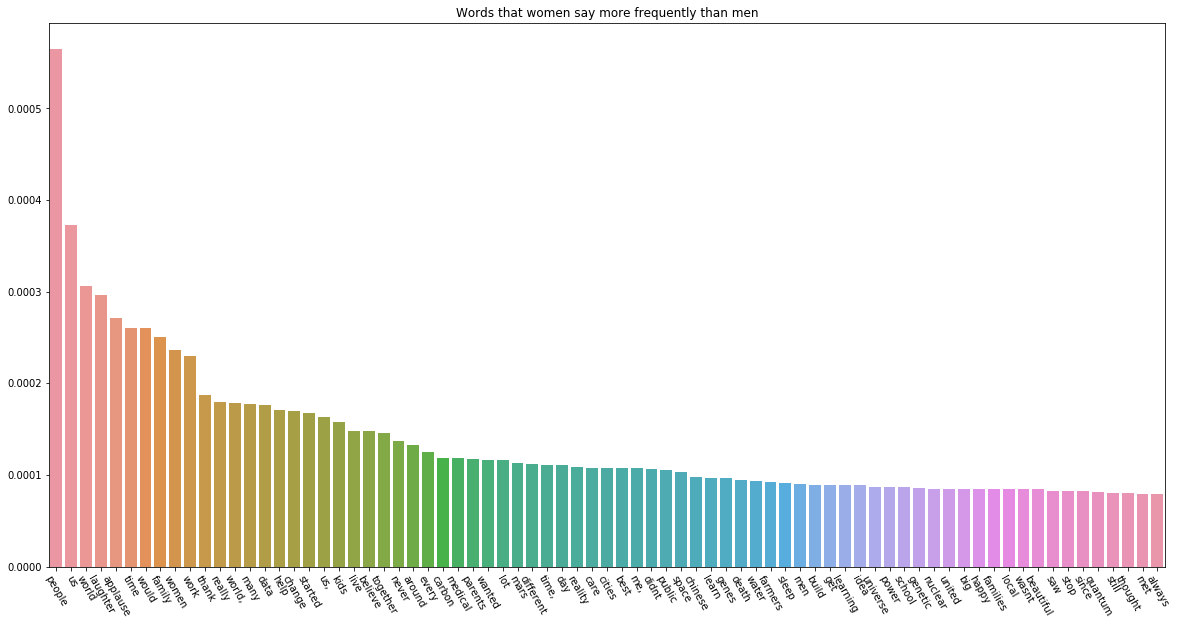

In [108]:
def sortWordsByGenderGap():
    normalizedMaleWordCounts, normalizedFemaleWordCounts = getNormalizedGenderWordCounts()
    doneWords = set() # To keep track of the words we've done
    genderGap = dict() # To record differnce by gender of word frequency
    
    # Loop through all male words and get gender difference
    for word, maleCount in normalizedMaleWordCounts.items():
        doneWords.add(word)
        if word in normalizedFemaleWordCounts.keys():
            femaleCount = normalizedFemaleWordCounts[word]
        else:
            femaleCount = 0
        diff = maleCount-femaleCount
        genderGap[word] = diff
        
    for word, femaleCount in normalizedFemaleWordCounts.items():
        # We already went through every word in male dictionary, if we reach it here, word count for men is 0,
        # therefore the difference between men and women frequencies for this word is just the women frequency.
        if word not in doneWords:
            genderGap[word] = -femaleCount 
    sortedMenFirst = sorted(genderGap.items(), key=operator.itemgetter(1),reverse=True)
    sortedWomenFirst = sorted(genderGap.items(), key=operator.itemgetter(1),reverse=False)
    
    # Plot a histogram of words that men say more frequently than women 
    _ = plt.figure(figsize=(20,10))
    _ = sns.barplot(list(dict(sortedMenFirst[0:75]).keys()), list(dict(sortedMenFirst[0:75]).values()))
    title = ('Words that men say more frequently than women')
    _ = plt.title(title)
    _ = plt.xticks(rotation=300)
    plt.show()
    
    # Plot a histogram of words that women say more frequently than men 
    _ = plt.figure(figsize=(20,10))
    _ = sns.barplot(list(dict(sortedWomenFirst[0:75]).keys()), np.fabs(list(dict(sortedWomenFirst[0:75]).values())))
    title = ('Words that women say more frequently than men')
    _ = plt.title(title)
    _ = plt.xticks(rotation=300)
    plt.show()
    return sortedMenFirst
_ = sortWordsByGenderGap()

Flagging some times of these high frequency difference words may help our classifier learn better!

### Now that we've explored into the differences of men and women's speech patterns, let's create some new features based off of what we haved learned!
The plan is to 
<br>1) Count word frequency of "high frequency male/female words"
<br>2) Count word frequency of word categories that proved to be different between genders
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;a) warm and agreeable
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;b) cold hearted
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;c) uncertainty
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;d) intensifiers
<br>3) Flag duration above a certain threshold
<br>4) Flag date published < certain date and > certain date

In [109]:
# 1) Count word frequency of "high frequency male/female words"
highMaleFreq = ['going','actually','know,','think','kind']
highFemaleFreq = ['people','us','world','laughter','applause']
highFreqMaleWordCounts = []
highFreqFemaleWordCounts = []

# 2) Count frequency of words from a certain category 
warmAgreeable = ['family','friends','wonderful','blessed','amazing','loving','husband','thankful']
uncertainty = ['um','uh']
intensifiers = ['very','so','such','really','totally','too']
coldHearted = ['kill','kills','dead','killing','die','swear','dead','murder']
warmAgreeableCounts = []
uncertaintyCounts = []
intensifierCounts = []
coldHeartedCounts = []

# 3) Flag duration above a certain threshold
longTalks = []

# 4) Flag date published before and after certain values
oldTalks = []
newTalks = []

# Loop through every row in the dataframe and create these new features
for row in data.itertuples():
    
    words = row.clean_transcripts.split()
    
    # 1)
    talkMaleFreqCount = 0
    talkFemaleFreqCount = 0
    
    # 2)
    talkWarmAgreeableCount = 0
    talkColdHeartedCount = 0
    talkIntensifierCount = 0
    talkUncertaintyCount = 0
    
    for word in words:
        # 1) 
        if word in highMaleFreq:
            talkMaleFreqCount +=1
        if word in highFemaleFreq:
            talkFemaleFreqCount +=1
        
        # 2)
        if word in warmAgreeable:
            talkWarmAgreeableCount +=1
        if word in coldHearted:
            talkColdHeartedCount +=1
        if word in intensifiers:
            talkIntensifierCount +=1
        if word in uncertainty:
            talkUncertaintyCount +=1
    
    # 1)
    highFreqMaleWordCounts.append(talkMaleFreqCount/float(len(words)))
    highFreqFemaleWordCounts.append(talkFemaleFreqCount/float(len(words)))
    
    # 2)
    warmAgreeableCounts.append(talkWarmAgreeableCount/float(len(words)))
    uncertaintyCounts.append(talkUncertaintyCount/float(len(words)))
    intensifierCounts.append(talkIntensifierCount/float(len(words)))
    coldHeartedCounts.append(talkColdHeartedCount/float(len(words)))

    # 3) 
    if row.duration > 1000:
        longTalks.append(1)
    else:
        longTalks.append(0)
    
    # 4) 
    if row.published_date > 1400000000:
        newTalks.append(1)
        oldTalks.append(0)
    elif row.published_date < 1300000000:
        newTalks.append(0)
        oldTalks.append(1)
    else:
        newTalks.append(0)
        oldTalks.append(0)
            
# 1)    
data['commonMaleWordFreq'] = highFreqMaleWordCounts
data['commonFemaleWordFreq'] = highFreqFemaleWordCounts

# 2)
data['warmAgreeable'] = warmAgreeableCounts
data['uncertainty'] = uncertaintyCounts
data['intensifiers'] = intensifierCounts
data['coldHearted'] = coldHeartedCounts

# 3)
data['longTalk'] = longTalks

# 4)
data['newTalk'] = newTalks
data['oldTalk'] = oldTalks

data.head()

,transcript,url,clean_transcripts,comments,description,duration,event,film_date,languages,main_speaker,...,applause_ratio,commonMaleWordFreq,commonFemaleWordFreq,warmAgreeable,uncertainty,intensifiers,coldHearted,longTalk,newTalk,oldTalk
0,Good morning. How are you?(Laughter)It's been ...,https://www.ted.com/talks/ken_robinson_says_sc...,good morninghow are you\nlaughter\nits been gr...,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,...,0.001020,0.011224,0.020068,0.001361,0.0,0.006463,0.000000,1,0,1
1,"Thank you so much, Chris. And it's truly a gre...",https://www.ted.com/talks/al_gore_on_averting_...,"thank you so much, chrisand its truly a great ...",265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,...,0.002972,0.005448,0.020307,0.001486,0.0,0.007925,0.000000,0,0,1
2,"(Music: ""The Sound of Silence,"" Simon & Garfun...",https://www.ted.com/talks/david_pogue_says_sim...,"music: the sound of silence, simon & garfunkel...",124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,...,0.003550,0.006776,0.017425,0.000323,0.0,0.011294,0.000000,1,0,1
3,If you're here today and I'm very happy that ...,https://www.ted.com/talks/majora_carter_s_tale...,if youre here today and im very happy that yo...,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,...,0.002073,0.003800,0.011744,0.001382,0.0,0.005181,0.000345,1,0,1
4,"About 10 years ago, I took on the task to teac...",https://www.ted.com/talks/hans_rosling_shows_t...,"about 10 years ago, i took on the task to teac...",593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,...,0.001017,0.002712,0.014915,0.002373,0.0,0.010169,0.000000,1,0,1


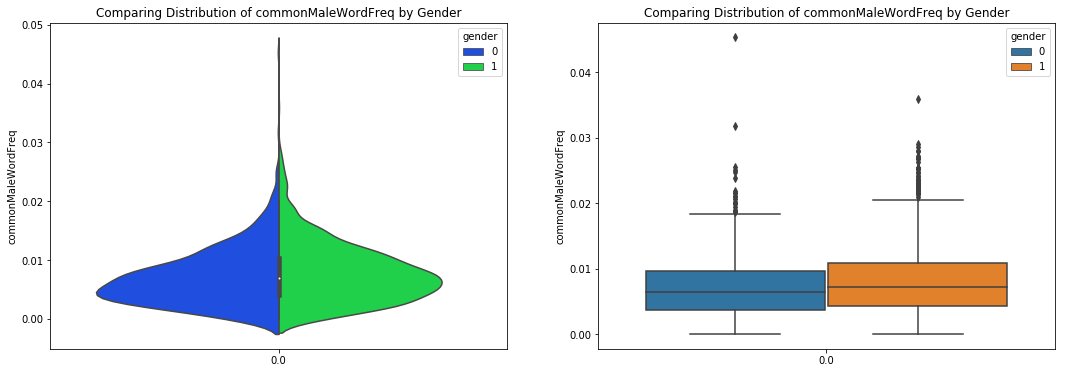

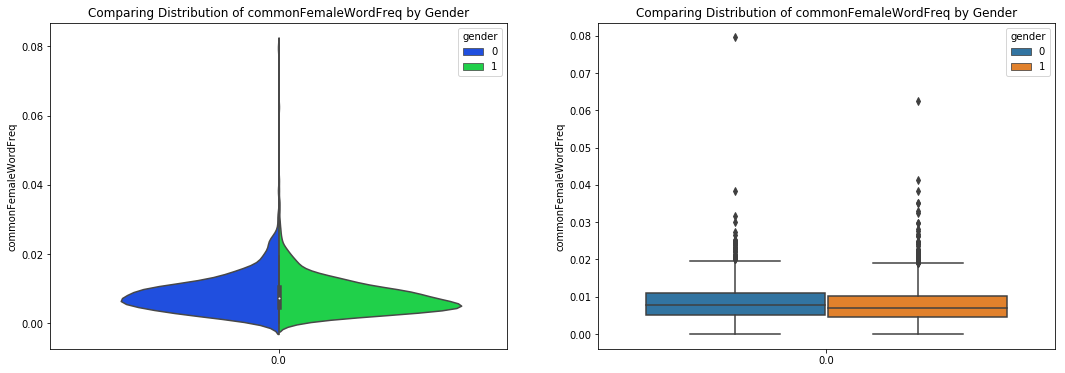

In [110]:
compareGenders('commonMaleWordFreq')
compareGenders('commonFemaleWordFreq')

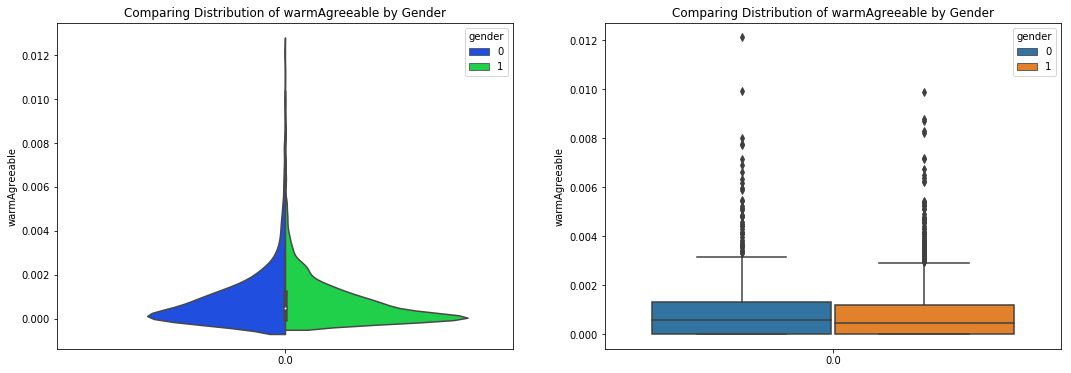

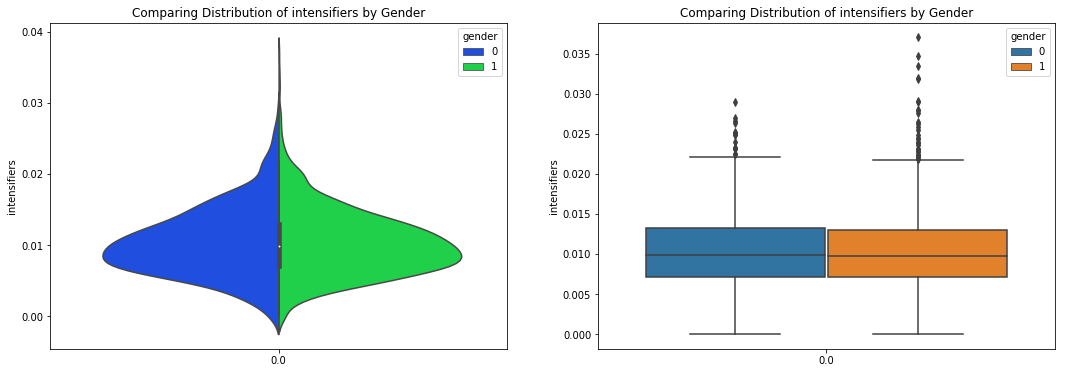

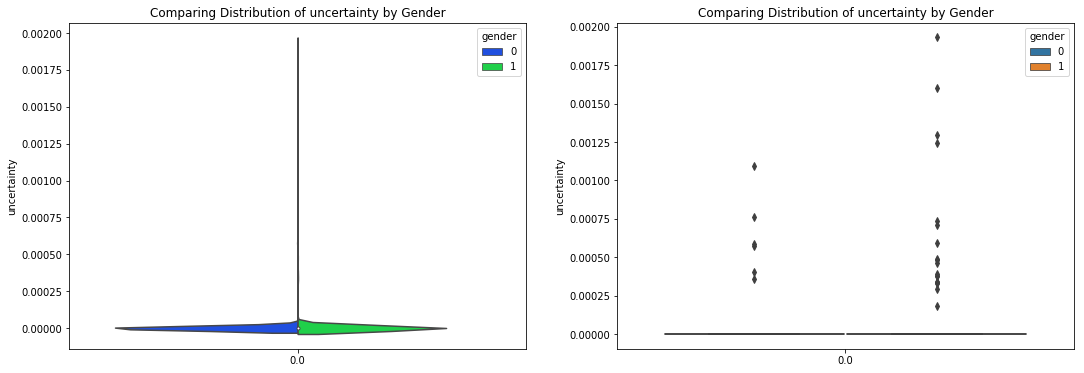

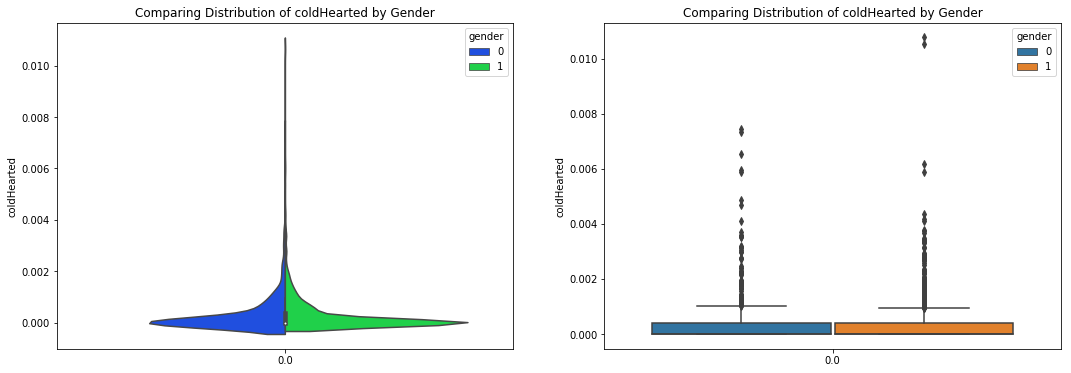

In [111]:
compareGenders('warmAgreeable')
compareGenders('intensifiers')
compareGenders('uncertainty')
compareGenders('coldHearted')

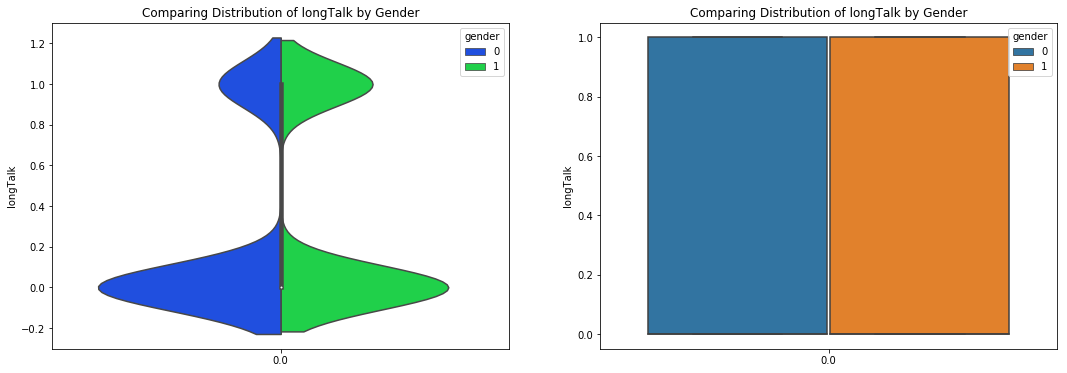

In [112]:
compareGenders('longTalk')

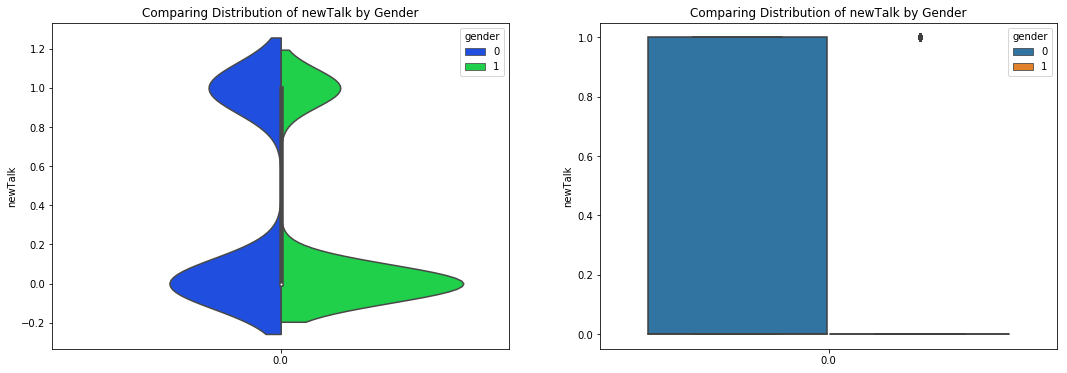

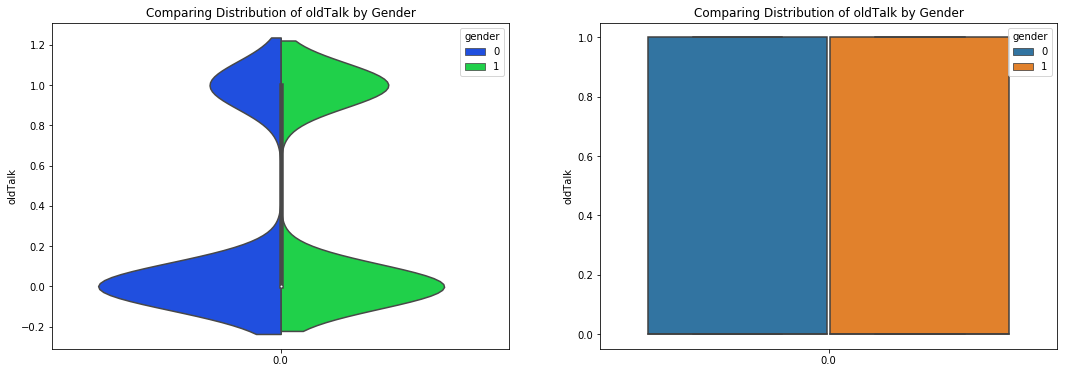

In [113]:
compareGenders('newTalk')
compareGenders('oldTalk')

Let's see if there are any interesting correlations between some of our new features and other features:

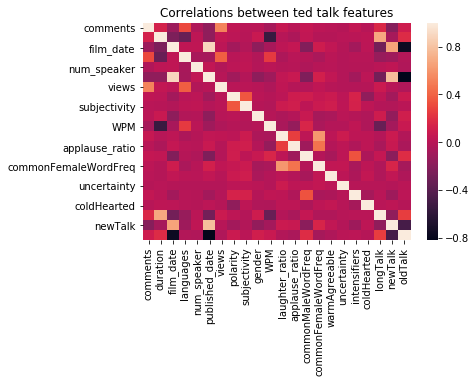

In [114]:
correlations = data.corr()
_ = sns.heatmap(correlations)
_ = plt.title('Correlations between ted talk features')
plt.show()

Some interesting correlations:<br>
1) Comments and long talks are positively correlated<br>
2) Long talks and old talks are positively correlated<br>
3) WPM and languages are positively correlated<br>
4) Common female words frequency is positively correlated with laughter ratio and applause ratio<br>

### Let's rerun our basic regression classifier and see if these new features help us any:

In [118]:
simpleGenderClf(data)

AUC: 0.574979837569


### Let's explore data some more by converting all of our categorical data to numeric data so we can analyze correlations and the like:

In [115]:
cat_columns = data.select_dtypes(['category']).columns
data[cat_columns] = data[cat_columns].apply(lambda x: x.cat.codes)

#### Trying to cluster the data

In [116]:
## This method generates k number of clusters specified in the function call. default value is 2.
def genClusters(dataFrame, k=2):
    vector_matrix = getTFIDFvectors(dataFrame)
    means = KMeans(k, random_state =0)
    result = means.fit_predict(vector_matrix)
    result_1 = means.fit_transform(vector_matrix)
    plt.scatter(result_1[:,0],result_1[:,1],c =result, cmap = 'autumn')
    plt.title("Basic Clustering without any transformation on the data")
    
    

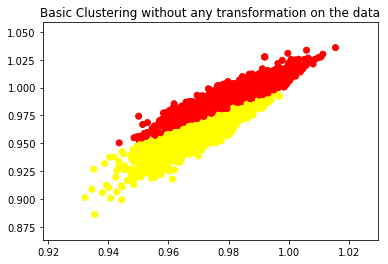

In [36]:
genClusters(data)

In [37]:
def genClusters_svd(dataFrame, k =2, n_comp = 5):
    vector_matrix = getTFIDFvectors(dataFrame)
    means = KMeans(k, random_state = 0)
    # doing TruncatedSVD on the matrix with specified number of components. PCA isn't supported on sparse matrices
    tSVD = TruncatedSVD(n_components = n_comp)
    transformed_vector_matrix = tSVD.fit_transform(vector_matrix)
    
    # Running Kmeans clustering algorithm on transformed data
    result = means.fit_predict(transformed_vector_matrix)
    result_1 = means.fit_transform(transformed_vector_matrix)
    plt.scatter(result_1[:,0],result_1[:,1],c =result, cmap = 'autumn')
    plt.title("Clustering the data after dimensionality reduction")

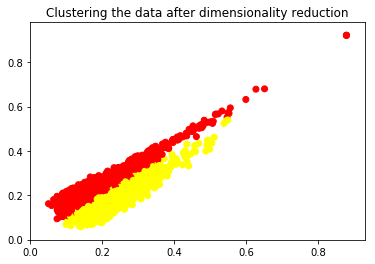

In [38]:
genClusters_svd(data,n_comp = 10)

In [43]:
data.head()

,transcript,url,clean_transcripts,comments,description,duration,event,film_date,languages,main_speaker,...,gender,WPM,laughter_ratio,applause_ratio,commonMaleWordFreq,commonFemaleWordFreq,warmAgreeable,uncertainty,intensifiers,coldHearted
0,Good morning. How are you?(Laughter)It's been ...,https://www.ted.com/talks/ken_robinson_says_sc...,good morninghow are you\nlaughter\nits been gr...,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,...,male,147.268041,0.012585,0.001020,0.011224,0.020068,0.001361,0.0,0.006463,0.000000
1,"Thank you so much, Chris. And it's truly a gre...",https://www.ted.com/talks/al_gore_on_averting_...,"thank you so much, chrisand its truly a great ...",265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,...,male,121.289662,0.010896,0.002972,0.005448,0.020307,0.001486,0.0,0.007925,0.000000
2,"(Music: ""The Sound of Silence,"" Simon & Garfun...",https://www.ted.com/talks/david_pogue_says_sim...,"music: the sound of silence, simon & garfunkel...",124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,...,male,141.041991,0.011294,0.003550,0.006776,0.017425,0.000323,0.0,0.011294,0.000000
3,If you're here today and I'm very happy that ...,https://www.ted.com/talks/majora_carter_s_tale...,if youre here today and im very happy that yo...,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,...,female,153.655914,0.002763,0.002073,0.003800,0.011744,0.001382,0.0,0.005181,0.000345
4,"About 10 years ago, I took on the task to teac...",https://www.ted.com/talks/hans_rosling_shows_t...,"about 10 years ago, i took on the task to teac...",593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,...,male,146.470588,0.003390,0.001017,0.002712,0.014915,0.002373,0.0,0.010169,0.000000


In [57]:
# Checking feature importance for regression to predict number of views
relevant_features = ['comments','duration','film_date','languages','num_speaker','published_date','polarity','subjectivity']
model = ExtraTreesClassifier()
model.fit(data[relevant_features], data['views'])

# display the relative importance of each attribute
print(model.feature_importances_)

model1 = LinearRegression(normalize=True)
rfe = RFE(model1, 2)
rfe = rfe.fit(data[relevant_features], data['views'])
print(rfe.support_)
print(rfe.ranking_)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

[0.14427295 0.14581641 0.14053615 0.12684809 0.00458976 0.14825345
 0.14350122 0.14618197]
[False False False False False False  True  True]
[4 5 7 2 3 6 1 1]


Based on Regression 2 most important features are polarity and subjectivity, which are columns generated using textblob

In [ ]:
# Run a logistic regression with a CV score and validation score
def LogRegMetrics(features, labels, num_folds=5):
    accuracies = []
    aucs = []
    fprs = []
    tprs = []

    skf = StratifiedKFold(n_splits=num_folds)
    _ = skf.get_n_splits(features, labels)

    for train_index, test_index in skf.split(features, labels):
        rand = np.random.randint(1, 100)
        X_train, X_test = features[train_index], features[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        clf = LogisticRegression(penalty='l2', max_iter=1000, random_state=rand)
        _ = clf.fit(X_train, y_train)
        accuracies.append(clf.score(X_test, y_test))
        pred = clf.predict(X_test)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
        auc = metrics.auc(fpr, tpr)
        fprs.append(fpr)
        tprs.append(tpr)
        aucs.append(auc)
 
    pred = clf.predict(validation.drop(['label'], axis=1))
    acc = clf.score(validation.drop(['label'], axis=1), validation.label)
    fpr, tpr, thresholds = metrics.roc_curve(validation.label, pred)
    auc = metrics.auc(fpr, tpr)

    print("Mean Accuracy for L2 norm is:\t\t\t{}".format(np.array(accuracies).mean()))
    print("St Dev for accuracy for L2 norm is:\t\t{}".format(np.std(accuracies, axis=0)))    
    print("Mean AUC for L2 norm is:\t\t\t{}".format(np.array(aucs).mean()))
    print("Mean True Positive Rate for L2 norm is:\t\t{}".format(np.array(tprs).mean()))
    print("Mean False Positive Rate for L2 norm is:\t{}".format(np.array(fprs).mean()))
    print("Validated accuracy score is:\t\t\t{}".format(acc))
    print("Validated area under the curve score is:\t{}".format(auc))